In [ ]:
import collections
import heapq
import functools
import itertools
import re
import sys
import math
import bisect
from typing import *

# 7장. 배열

## Q10) 배열 파티션 I

n개의 페어를 이용한 min(a,b)의 합으로 만들 수 있는 가장 큰 수를 출력하라



(example)

in = [1,4,3,2]

out = 4

## A10_1) 오름차순 풀이

앞에서부터 오름차순으로 인접 페어를 만들어 더하는 방식

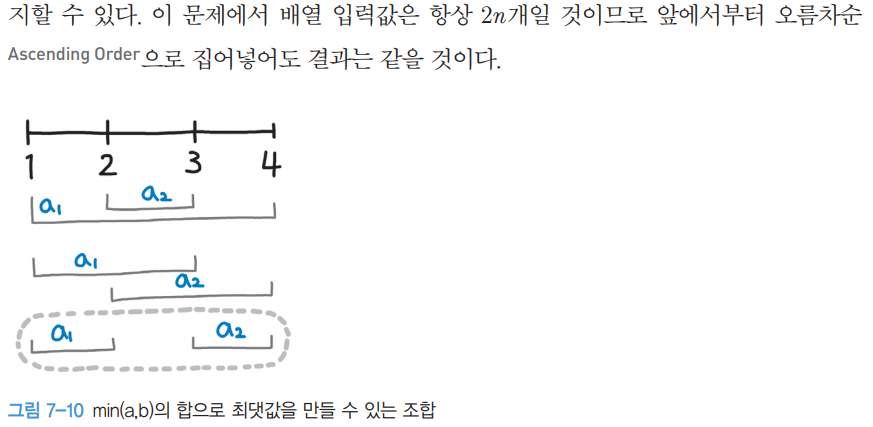

- 오름차순으로 정렬하여 앞에서부터 페어를지어 더할 때 가장 크다

In [ ]:
def arrayPairSum(nums: list) -> int:
   # 타입 힌트로 인풋/아웃풋 명확하게 명시
   sum = 0
   pair = []
   nums.sort()

   for n in nums:
     #앞에서부터 오름차순으로 페어를 만들어서 합 계산
     pair.append(n)
     if len(pair) ==2 :
       sum += min(pair)
       pair = []

   return sum

In [ ]:
%timeit -n 100 arrayPairSum([1,4,3,2])

100 loops, best of 3: 1.97 µs per loop


## A10_2) 짝수 번째 값 계산

오름차순한 짝수번째 인덱스의 값이 무조건 최소값임을 이용하여 페어를 만들어 min()을 사용하지 않고 짝수값만 더하는 방식

In [ ]:
def arrayPairSum(nums: [int]) -> int:
   # 타입 힌트로 인풋/아웃풋 명확하게 명시
   sum = 0
   nums.sort()

   for i, n in enumerate(nums):
     #짝수번째 값의 합 계산
     if i % 2 == 0:
       sum += n 

   return sum

In [ ]:
%timeit -n 100 arrayPairSum([1,4,3,2])

100 loops, best of 3: 804 ns per loop


## A10_3) Pythonic Way

짝수번째 합 방식을 슬라이싱을 사용하여 간결하게 표

In [ ]:
def arrayPairSum(nums: [int]) -> int:
   return sum(sorted(nums)[::2])

In [ ]:
%timeit -n 100 arrayPairSum([1,4,3,2])

100 loops, best of 3: 898 ns per loop


파이썬 슬라이싱

a[start:end:step]

- start, end, step 모두 양수와 음수 가능
- start: 슬라이싱을 시작할 시작위치
- end: 슬라이싱을 끝낼 위치로 end는 포함하지 않음
- step: stride라고도 하며 몇개씩 끊어서 가져올지에 대한 옵션

## Q11) 자신을 제외한 배열의 곱

배열을 입력받아 output[i]가 자신을 제외한 나머지 모든 요소의 곱셈 결과가 되도록 출력하라. 단, 나눗셈을 하지 않고 *O(n)*에 풀이하라



(example)

in = [1,2,3,4]

out = [24,12,8,6]

## A11_1) 왼쪽 곱셈 결과에 오른쪽 값을 차례대로 곱셈

앞에서부터 오름차순으로 인접 페어를 만들어 더하는 방식

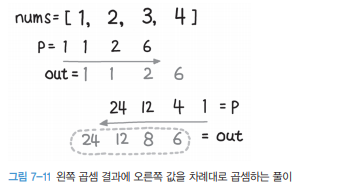

In [ ]:
def productExceptSelf(nums :[int]) -> [int]:
  left = []
  p = 1
  #왼쪽 곱셈
  for i in range(0,len(nums)):
    left.append(p)
    p = p * nums[i]
  
  right = []
  p = 1
  #오른쪽 곱셈
  for i in range(len(nums)-1, 0-1, -1): #-1씩 차례대로 증분
    right.insert(0,p)
    p = p * nums[i]

  
  out  = [left[i]*right[-i-1] for i in range(len(left))]

  return "'left':{0}, 'right':{1}, out:{2}".format(left,right,out)

In [ ]:
%timeit -n 100 productExceptSelf([1,2,3,4])
productExceptSelf([1,2,3,4])

100 loops, best of 3: 9.17 µs per loop


"'left':[1, 1, 2, 6], 'right':[24, 12, 4, 1], out:[1, 4, 24, 144]"

In [ ]:
def productExceptSelf(nums :[int]) -> [int]:
  out = []
  p = 1
  #왼쪽 곱셈
  for i in range(0,len(nums)):
    out.append(p)
    p = p * nums[i]
  
  p = 1
  #왼쪽 곱셈 결과에 오른쪽 값을 차례대로 곱셈
  for i in range(len(nums)-1, 0-1, -1): #-1씩 차례대로 증분
    out[i] = out[i] *p
    p = p * nums[i]
  
  return out

In [ ]:
%timeit -n 100 productExceptSelf([1,2,3,4])
productExceptSelf([1,2,3,4])

100 loops, best of 3: 1.95 µs per loop


[24, 12, 8, 6]

## A_try)

In [ ]:
def productExceptSelf(nums :[int]) -> [int]:
  out = []
  for i in nums:
    a = nums.copy()
    a.remove(i)
    p = 1
    for j in a:
      p = p*j

  out.append(p)
  
  return out  

In [ ]:
%timeit -n 100 productExceptSelf([1,2,3,4])
productExceptSelf([1,2,3,4])

100 loops, best of 3: 2.23 µs per loop


[24, 12, 8, 6]

## Q12) 주식을 사고팔기 가장 좋은 시점

한번의 거래로 낼 수 있는 최대 이익을 산출하라



(example)

in = [7,1,5,3,6,4]

out = [5]

## A12_1) 부르트 포스로 계산

*O(n^2)*으로 사고 팔고를 반복한 뒤 최대값을 계산하는 방식

타임아웃으로 풀리지 않음으로 효율적인 풀이가 필요

In [ ]:
def MaxProfit(prices: [int]) -> int:
  max_price = 0

  for i, price in enumerate(prices):
    for j in range(i, len(prices)):
      max_price = max(prices[j]-price, max_price)

  return max_price    

In [ ]:
%timeit -n 100 MaxProfit([7,1,5,3,6,4])
MaxProfit([7,1,5,3,6,4])

100 loops, best of 3: 6.84 µs per loop


5

## A12_2) 저점과 현재 값과의 차이 계산

이전의 저점을 기준으로 현재 가격과의 차이를 계산하고 이를 계속 교체해나가는 방식. 

카데인 알고리즘과 유사하며 최대 서브 배열을 찾는 문제를 *O(n)*으로 풀이가능

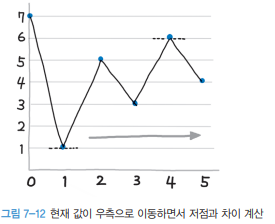

기술통계를 통해 풀이에 대한 직관을 얻을 수 있다

In [ ]:
def MaxProfit(prices : [int]) -> int:
  profit = 0
  min_price = sys.maxsize
  #초기값을 None으로 지정할 경우 typeError발생 가능

  #최솟값과 최댓값을 계속 갱신
  for price in prices:
    min_price = min(min_price, price)
    profit = max(profit, price - min_price)

  return profit

In [ ]:
%timeit -n 100 MaxProfit([7,1,5,3,6,4])
MaxProfit([7,1,5,3,6,4])

100 loops, best of 3: 3.5 µs per loop


5

## A_try)

In [ ]:
def MaxProfit(prices : [int]) -> int:
  price_list = []
  for i, price in enumerate(prices):
    max_price = max(prices[i:]) - price
    price_list.append(max_price)

  return max(price_list)

In [ ]:
%timeit -n 100 MaxProfit([7,1,5,3,6,4])
MaxProfit([7,1,5,3,6,4])

100 loops, best of 3: 2.92 µs per loop


5

## 참고) 카데인 알고리즘을 이용한 최대서브 배열 찾기

합이 최대가 되는 연속 서브 배열을 찾아 합을 리턴하는 문제

(example)

in = [-2,1,-3,4,-1,2,1,-5,4]

out= 6 ([4,-1,2,1])

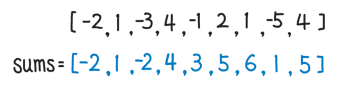

- 누적 합을 계산하면서 현재값과의 최대값을 찾음

In [ ]:
def maxSubArray(nums :[int]) -> int:
  best_sum = -sys.maxsize
  current_sum = 0
  for num in nums:
    current_sum = max(num, current_sum + num)
    best_sum = max(best_sum, current_sum)

  return best_sum

In [ ]:
 maxSubArray([-2,1,-3,4,-1,2,1,-5,4])

6